# 客户信用风险预测

## 一、 任务描述与分析
### 数据集描述

我们选择的数据集包含了1000个样本，每个样本有20个属性和1个类别标签。属性包括了贷款人的个人信息、贷款的金额、期限、目的、信用历史等，类别标签表示贷款人的信用风险等级。  
下表为客户信用风险数据包含的各类属性及其含义

|属性名称|	含义|
|   :----- |  :----- |
|hecking_status|	支票账户的状态，无账户、余额低于200欧元，余额高于200欧元。|
|duration|	贷款的期限，以月为单位。|
|credit_history|	贷款人的信用历史，如无信用记录，所有贷款已还清，有贷款正在还，有逾期记录，或有严重违约记录。|
|purpose|	贷款的目的，如购买汽车，家具，电器，教育，或其他。|
|credit_amount|	贷款的金额，以欧元为单位。|
|savings_status|	储蓄账户的状态，如无账户，余额低于100欧元，余额在100-500欧元之间，余额在500-1000欧元之间，或余额高于1000欧元。|
|employmen|	就业状况，如失业或低于一年，一年到四年，四年到七年，或超过七年。|
|installment_commitment|	每月还款占可支配收入的百分比。|
|personal_statu|	个人状态，如性别和婚姻状况。|
|other_parties|	是否有其他担保人或共同借款人。|
|residence_since|	在当前住址居住的时间，以年为单位。|
|property_magnitude	|拥有的财产类型，如无财产，汽车，房屋，或其他。|
|age|	贷款人的年龄，以年为单位。|
|other_payment_plans	|是否有其他还款计划或债务。|
|housing	|住房状况，如租房，自有房屋，或免费住房。|
|existing_credits	|已有的信用卡或贷款数量。|
|job	|职业类型，如无技能或半技能工人，技能工人或员工，管理者或自雇人士等。|
|num_dependents	|负担的家属数量。|
|own_telephone	|是否拥有固定电话。|
|foreign_worke	|是否是外国工作者。|
|class	|信用风险等级，如好（无违约风险）或坏（有违约风险）。|


### 任务

将这个数据集用于训练和测试信用风险模型，预测贷款人的信用风险。这是一个二分类任务，最终模型输出的结果是将贷款人的信用分类为good或bad。

### 目标函数

项目最终使用的模型是梯度提升树（Gradient Boosting Classifier），它是一种集成学习的方法，通过组合多个弱分类器来构建一个强分类器。梯度提升树的基本思想是在每一轮迭代中，根据损失函数的负梯度来拟合一个新的分类器，并将其加入到现有的分类器中，从而不断提升模型的预测能力。

梯度提升树可以优化任意可微分的损失函数，模型选用的损失函数是对数损失。

对数损失，也称为交叉熵损失，适用于二分类或多分类问题，对数损失的公式：
$L(y,p)=-\sum_{i=1}^N\sum_{j=1}^Ky_{ij}logp_{ij}$

其中，N是样本数量，K是类别数量，$y_{ij}$是一个二值指标，表示第i个样本是否属于第j个类别，$p_{ij}$是模型预测第i个样本属于第j个类别的概率。
对数损失的含义为若模型预测的概率值和真实标签一致，那么对数损失趋近于0，如果模型预测的概率值和真实标签相反，那么对数损失趋近于无穷大。因此，对数损失可以反映模型的分类效果和置信度，越小越好。

### 二、数据可视化及统计分析

In [1]:
import pandas as pd
import numpy as np
credit=pd.read_csv("./credit_customers.csv")

In [2]:
credit.info()
print("重复的数据行数：",credit.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [3]:
# 查看数据集中是否有缺失值
print(credit.isnull().any())

checking_status           False
duration                  False
credit_history            False
purpose                   False
credit_amount             False
savings_status            False
employment                False
installment_commitment    False
personal_status           False
other_parties             False
residence_since           False
property_magnitude        False
age                       False
other_payment_plans       False
housing                   False
existing_credits          False
job                       False
num_dependents            False
own_telephone             False
foreign_worker            False
class                     False
dtype: bool


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


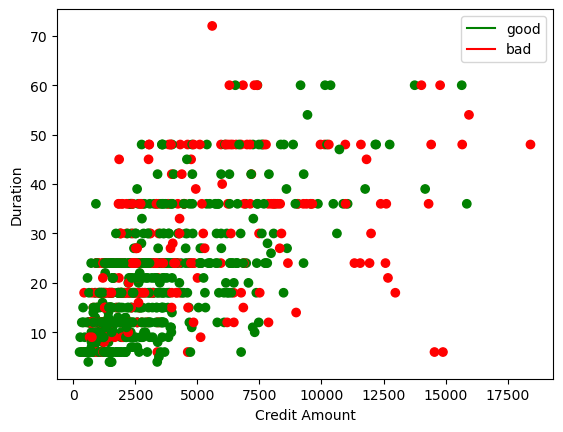

In [5]:
x_c = credit['credit_amount']
y_c = credit['duration']
c = credit['class']
color_dict = {'bad': 'red', 'good': 'green'}

scatter = plt.scatter(x_c, y_c, color=c.apply(color_dict.get), label=c)

plt.xlabel('Credit Amount')
plt.ylabel('Duration')

handle =[ plt.Line2D([0],[0],color='g',label='good'),plt.Line2D([0],[0],color='r',label='bad')]
plt.legend(handles = handle)
plt.show()

原始数据由1000个样本组成，其中每个样本中含有20个特征和1个标签(class)，特征中不存在缺失值但存在类别型数据和数值型数据，类别型数据是未编码的，需要进行编码转换。

### 三、特征工程

#### （一）数据转换
对类别型数据进行编码，首先查看各个类别型特征分别有哪几种类别，统计各个类别的占比，进而判断应该对数据进行哪种编码处理。

In [6]:
# 统计每个类别变量的比例
for var in credit.select_dtypes(include=['object']).columns:
    # 使用value_counts函数计算每个类别的频数
    frequency = credit.select_dtypes(include=['object'])[var].value_counts()
    # 计算总的观测数量
    total_count = frequency.sum()
    # 计算每个类别的比例
    proportions = frequency / total_count
    # 打印结果
    print("Variable:", var)
    print(proportions)
    print("----------------------------------------")

Variable: checking_status
no checking    0.394
<0             0.274
0<=X<200       0.269
>=200          0.063
Name: checking_status, dtype: float64
----------------------------------------
Variable: credit_history
existing paid                     0.530
critical/other existing credit    0.293
delayed previously                0.088
all paid                          0.049
no credits/all paid               0.040
Name: credit_history, dtype: float64
----------------------------------------
Variable: purpose
radio/tv               0.280
new car                0.234
furniture/equipment    0.181
used car               0.103
business               0.097
education              0.050
repairs                0.022
domestic appliance     0.012
other                  0.012
retraining             0.009
Name: purpose, dtype: float64
----------------------------------------
Variable: savings_status
<100                0.603
no known savings    0.183
100<=X<500          0.103
500<=X<1000         0.063


根据上述结果，选择对一些无序的类别变量进行独热编码。

In [7]:
data=pd.get_dummies(credit,columns=['purpose', 'personal_status',"other_parties","property_magnitude"])

但是为了避免维数灾难，不能对所有变量进行独热编码，因此对另外一些有序的以及只有两种类别的分类变量进行自定义编码

In [8]:
cols = ['checking_status','credit_history', 'savings_status', 'employment', 'other_payment_plans','housing', 
        'job','own_telephone','foreign_worker','class']
# 映射字典
col_dicts = {}
col_dicts = {
  'checking_status': {
    'no checking': 0,
    '<0': 1,
    '0<=X<200': 2,
    '>=200': 3
  },
             
  'credit_history': {
      'existing paid': 0,
      'critical/other existing credit': 1,
      'delayed previously': 2,
      'all paid': 3,
      'no credits/all paid': 4
  },

'savings_status': {
      'no known savings': 0,
      '<100': 1,
      '100<=X<500': 2,
      '500<=X<1000': 3,
      '>=1000': 4
  },

 'employment': {
  'unemployed': 0,
  '<1': 1,
  '1<=X<4': 2,
  '4<=X<7': 3,
  '>=7': 4
  },

'other_payment_plans':{
    'none':0,
    'bank':1,
    'stores':2
},
      
 'housing': {'for free': 0, 'rent': 1, 'own': 2},

 'job': {
  'unemp/unskilled non res': 0,
  'unskilled resident': 1,
  'skilled': 2,
  'high qualif/self emp/mgmt': 3
  },

  'own_telephone': {'none': 0, 'yes': 1},

  'foreign_worker': {'no': 1, 'yes': 0},

  'class': {'bad': 0, 'good': 1}
 }


for col in cols:
    data[col] = credit[col].map(lambda x: x.strip())
    data[col] = credit[col].map(col_dicts[col])

In [9]:
# 打印编码后的数据集
data

,checking_status,duration,credit_history,credit_amount,savings_status,employment,installment_commitment,residence_since,age,other_payment_plans,...,personal_status_male div/sep,personal_status_male mar/wid,personal_status_male single,other_parties_co applicant,other_parties_guarantor,other_parties_none,property_magnitude_car,property_magnitude_life insurance,property_magnitude_no known property,property_magnitude_real estate
0,1,6.0,1,1169.0,0,4,4.0,4.0,67.0,0,...,0,0,1,0,0,1,0,0,0,1
1,2,48.0,0,5951.0,1,2,2.0,2.0,22.0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,12.0,1,2096.0,1,3,2.0,3.0,49.0,0,...,0,0,1,0,0,1,0,0,0,1
3,1,42.0,0,7882.0,1,3,2.0,4.0,45.0,0,...,0,0,1,0,1,0,0,1,0,0
4,1,24.0,2,4870.0,1,2,3.0,4.0,53.0,0,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,12.0,0,1736.0,1,3,3.0,4.0,31.0,0,...,0,0,0,0,0,1,0,0,0,1
996,1,30.0,0,3857.0,1,2,4.0,4.0,40.0,0,...,1,0,0,0,0,1,0,1,0,0
997,0,12.0,0,804.0,1,4,4.0,4.0,38.0,0,...,0,0,1,0,0,1,1,0,0,0
998,1,45.0,0,1845.0,1,2,4.0,4.0,23.0,0,...,0,0,1,0,0,1,0,0,1,0


In [10]:
# 设特征集和目标变量
y = data["class"]
feature_vars = data.drop('class', axis=1).columns
X = data[feature_vars]

#### （二）描述性统计分析

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# 输出描述统计表
data.describe()

,checking_status,duration,credit_history,credit_amount,savings_status,employment,installment_commitment,residence_since,age,other_payment_plans,...,personal_status_male div/sep,personal_status_male mar/wid,personal_status_male single,other_parties_co applicant,other_parties_guarantor,other_parties_none,property_magnitude_car,property_magnitude_life insurance,property_magnitude_no known property,property_magnitude_real estate
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,1.001000,20.903000,0.776000,3271.258000,1.190000,2.384000,2.973000,2.845000,35.546000,0.233000,...,0.050000,0.092000,0.54800,0.041000,0.052000,0.907000,0.332000,0.23200,0.154000,0.282000
std,0.957034,12.058814,1.060636,2822.736876,0.966869,1.208306,1.118715,1.103718,11.375469,0.522479,...,0.218054,0.289171,0.49794,0.198389,0.222138,0.290578,0.471167,0.42232,0.361129,0.450198
min,0.000000,4.000000,0.000000,250.000000,0.000000,0.000000,1.000000,1.000000,19.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,12.000000,0.000000,1365.500000,1.000000,2.000000,2.000000,2.000000,27.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,18.000000,0.000000,2319.500000,1.000000,2.000000,3.000000,3.000000,33.000000,0.000000,...,0.000000,0.000000,1.00000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000
75%,2.000000,24.000000,1.000000,3972.250000,1.000000,4.000000,4.000000,4.000000,42.000000,0.000000,...,0.000000,0.000000,1.00000,0.000000,0.000000,1.000000,1.000000,0.00000,0.000000,1.000000
max,3.000000,72.000000,4.000000,18424.000000,4.000000,4.000000,4.000000,4.000000,75.000000,2.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


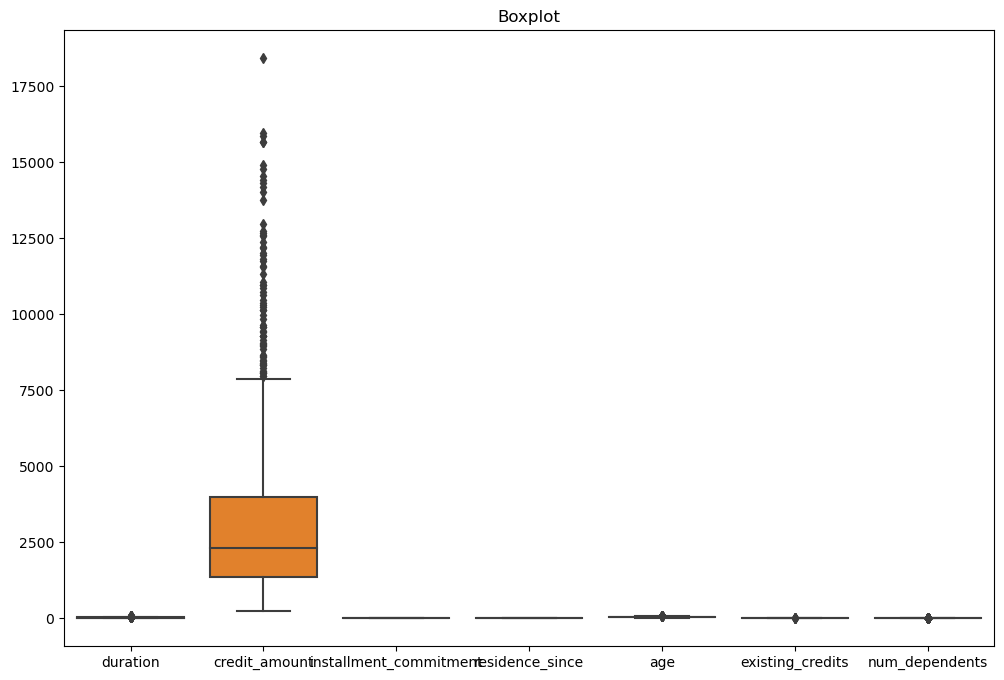

In [12]:
numeric_vars = ['duration', 'credit_amount', 'installment_commitment','residence_since','age','existing_credits','num_dependents']  # 数值型变量
# 绘制箱线图
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[numeric_vars])
plt.title("Boxplot")
plt.show()


观察以上箱线图，可以看到credit-amount存在较多的异常值，进一步观察其异常值是否与信用情况“class”相关。

In [13]:
# 创建分箱区间
bins = pd.cut(data['credit_amount'], bins=5)

# 将数据分箱并添加新列
data['credit_amount_bin'] = bins

# 分组统计并计算频数
freq = data.groupby(['credit_amount_bin', 'class']).size().unstack()
freq.columns.name = None  # 清除列名的索引名称

# 计算每个分组内部的百分比
percent = freq.div(freq.sum(axis=1), axis=0) * 100
percent.columns.name = None  # 清除列名的索引名称

# 合并结果
result = pd.concat([freq, percent], axis=1)
print(result)

                      0    1          0          1
credit_amount_bin                                 
(231.826, 3884.8]   189  549  25.609756  74.390244
(3884.8, 7519.6]     68  109  38.418079  61.581921
(7519.6, 11154.4]    23   34  40.350877  59.649123
(11154.4, 14789.2]   16    6  72.727273  27.272727
(14789.2, 18424.0]    4    2  66.666667  33.333333


可以看出在credit_amount较小的客户群体中，较低比例为信用差的，随着credit_amount的增长，信用差的客户比例逐渐提升。

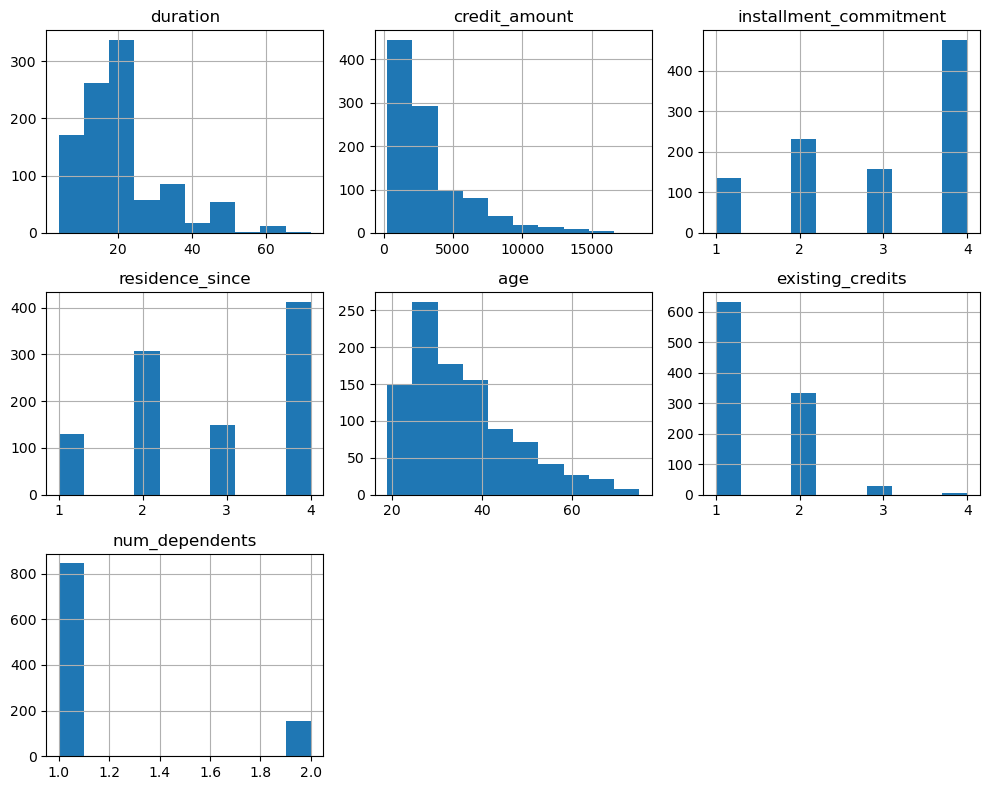

In [14]:
# 直方图
# 选择前几列变量，剔除独热编码的变量
data[numeric_vars].hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

由上可见，数值型数据分布不服从正态分布，需进行标准化处理。

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# 对数据进行标准化

data_to_normalize = data[numeric_vars]

normalized_data = scaler.fit_transform(data_to_normalize)

# 将标准化后的数据更新回原始数据框中的对应列
data[numeric_vars] = normalized_data
data


,checking_status,duration,credit_history,credit_amount,savings_status,employment,installment_commitment,residence_since,age,other_payment_plans,...,personal_status_male mar/wid,personal_status_male single,other_parties_co applicant,other_parties_guarantor,other_parties_none,property_magnitude_car,property_magnitude_life insurance,property_magnitude_no known property,property_magnitude_real estate,credit_amount_bin
0,1,-1.236478,1,-0.745131,0,4,0.918477,1.046987,2.766456,0,...,0,1,0,0,1,0,0,0,1,"(231.826, 3884.8]"
1,2,2.248194,0,0.949817,1,2,-0.870183,-0.765977,-1.191404,0,...,0,0,0,0,1,0,0,0,1,"(3884.8, 7519.6]"
2,0,-0.738668,1,-0.416562,1,3,-0.870183,0.140505,1.183312,0,...,0,1,0,0,1,0,0,0,1,"(231.826, 3884.8]"
3,1,1.750384,0,1.634247,1,3,-0.870183,1.046987,0.831502,0,...,0,1,0,1,0,0,1,0,0,"(7519.6, 11154.4]"
4,1,0.256953,2,0.566664,1,2,0.024147,1.046987,1.535122,0,...,0,1,0,0,1,0,0,1,0,"(3884.8, 7519.6]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,-0.738668,0,-0.544162,1,3,0.024147,1.046987,-0.399832,0,...,0,0,0,0,1,0,0,0,1,"(231.826, 3884.8]"
996,1,0.754763,0,0.207612,1,2,0.918477,1.046987,0.391740,0,...,0,0,0,0,1,0,1,0,0,"(231.826, 3884.8]"
997,0,-0.738668,0,-0.874503,1,4,0.918477,1.046987,0.215835,0,...,0,1,0,0,1,1,0,0,0,"(231.826, 3884.8]"
998,1,1.999289,0,-0.505528,1,2,0.918477,1.046987,-1.103451,0,...,0,1,0,0,1,0,0,1,0,"(231.826, 3884.8]"


In [16]:

# 计算数值型变量与分类目标变量之间的相关系数（皮尔逊相关系数）
correlation_matrix = data[numeric_vars + ["class"]].corr()
# 相关系数矩阵
correlation_matrix

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,class
duration,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834,-0.214927
credit_amount,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142,-0.154739
installment_commitment,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207,-0.072404
residence_since,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643,-0.002967
age,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201,0.091127
existing_credits,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667,0.045732
num_dependents,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000,0.003015
class,-0.214927,-0.154739,-0.072404,-0.002967,0.091127,0.045732,0.003015,1.000000


**热力图**

为更直观地展现数值型变量与分类变量之间的相关性，绘制热力图。

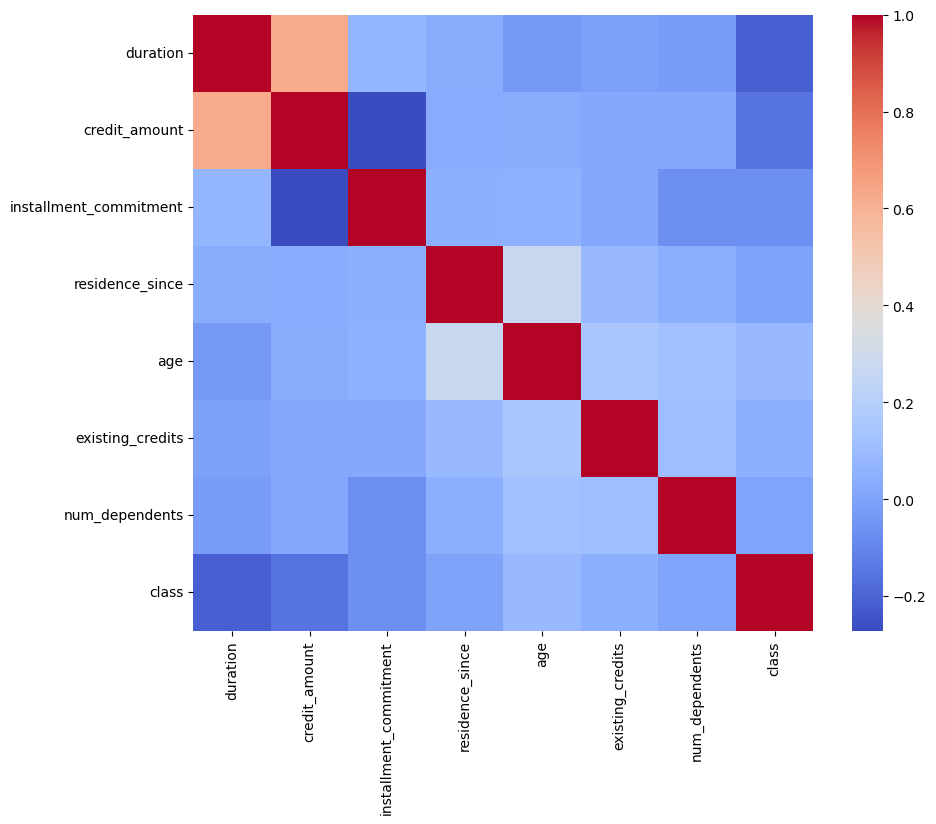

In [17]:
# 热力图
correlation_matrix = data[numeric_vars + ["class"]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=None, cmap='coolwarm')
plt.show()


可见，数值型变量间的相关性不强，并且，与分类目标之间的相关性也较低，相关系数绝对值基本在0.2以下。

我们还尝试对类别型数据和分类目标变量进行卡方统计检验，结果显示，P值均不显著。

还需进一步分析。尝试计算特征和目标变量之间的互信息，筛选互信息不为0的特征作为新的特征子集。另外，尝试调用lasso包进行特征筛选，经过对比，互信息不为0的特征构造的特征子集效果较佳

In [18]:
from sklearn.feature_selection import mutual_info_classif
# 计算特征和目标的互信息
mutual_info = mutual_info_classif(data[X.columns.tolist()],data["class"])
selected_features=[]
print("\nMutual Information:")
for i, info in enumerate(sorted(mutual_info,reverse=True)):
    if info > 0:
        print(f"{X.columns[i]}: {info}")
        selected_features.append(f'{X.columns[i]}')
selected_features
len(selected_features)


Mutual Information:
checking_status: 0.04699135705094282
duration: 0.04330662468319302
credit_history: 0.03391640370350979
credit_amount: 0.03391478341528109
savings_status: 0.02723522557925051
employment: 0.02677048396914894
installment_commitment: 0.02449237225795864
residence_since: 0.020214598571190123
age: 0.016842218228109385
other_payment_plans: 0.014349035637167606
housing: 0.012798435579554956
existing_credits: 0.01180247606503615
job: 0.011575303593112318
num_dependents: 0.011118480561582711
own_telephone: 0.0109359339466375
foreign_worker: 0.0108243176433791
purpose_business: 0.007501113650464353
purpose_domestic appliance: 0.007023680042917535
purpose_education: 0.005486420818044513
purpose_furniture/equipment: 0.0044300992169270526
purpose_new car: 0.004343118049585426
purpose_other: 0.0036532756813743017
purpose_radio/tv: 0.0017233287243545448
purpose_repairs: 0.0002053553421257348
purpose_retraining: 5.8401751418912795e-05


25

我们通过计算特征与目标变量之间的互信息筛选出一个互信息不为0的特征子集。

互信息（Mutual Information）：互信息是一种非线性相关性度量，用于衡量两个变量之间的信息共享程度。它可以用于衡量数值型变量和二分类变量之间的关联程度。


### 四、模型训练

#### （一）划分数据集

In [19]:
from sklearn.model_selection import train_test_split
# 先将X设为互信息不为0的特征子集
X=X[selected_features]
# 将数据集分为0.9的训练集和0.1的测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
# 打印各个数据集的形状
print(X_train.shape)
print(X_test.shape)

(900, 25)
(100, 25)


#### （二）模型与评估

**性能指标**

- 准确率 accuracy   
- AUC

**类别不平衡处理**

根据前面对类别变量的类比占比统计结果，可以看到目标变量中good与bad的比例为**7：3**，存在不平衡，由于在实际应用中将信用不好的客户判断为好，可能带来较大的损失，应更将关注较少数的信用不好的情况。

因此，我们在模型拟合过程中对样本权重进行调整，将信用好的样本权重设为**0.84**，信用不好的样本权重设为**1**，这是一种正则化的方法，可以改变损失函数或评估指标对不同样本的敏感度，从而影响模型参数的更新方向和幅度。

另外，也使得模型将更加关注信用不好的样本情况，从而提高模型性能。


In [20]:
# 导入相关模型的包
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score, GridSearchCV

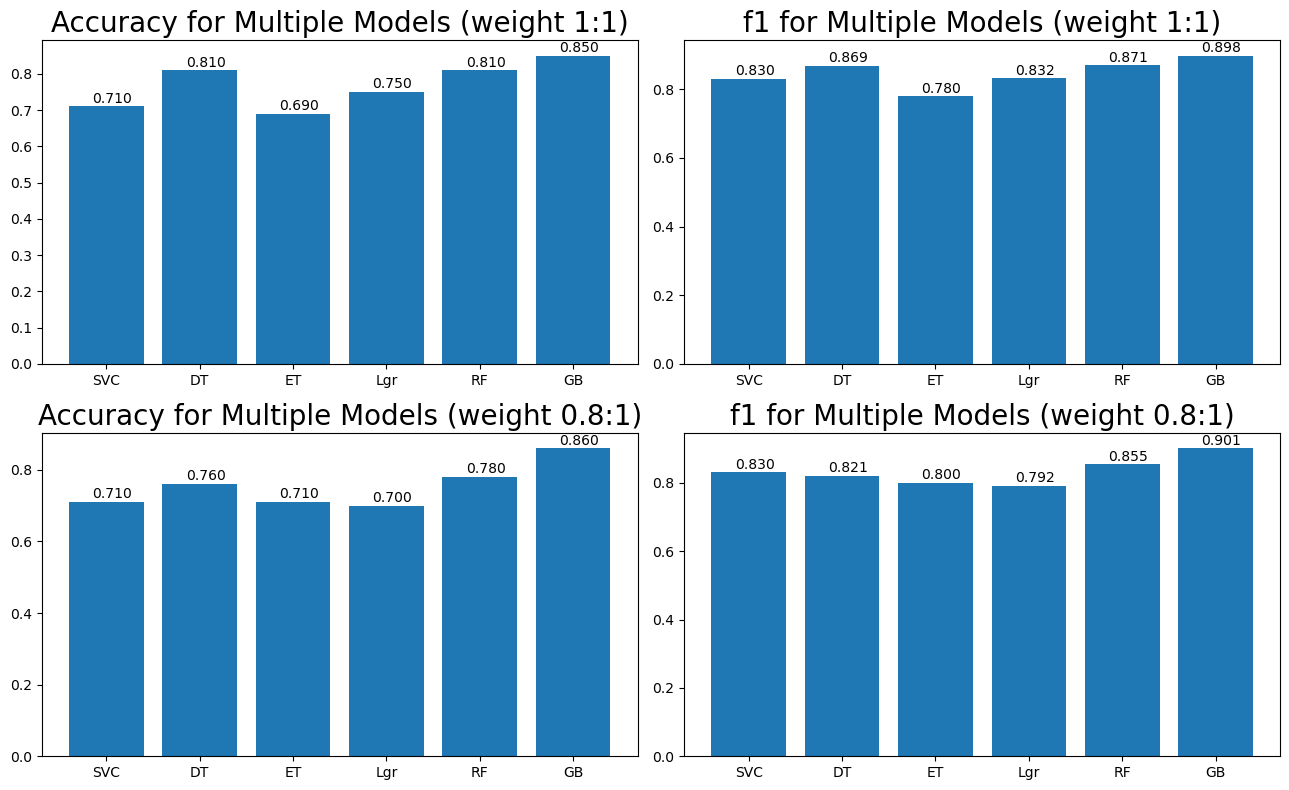

<function matplotlib.pyplot.show(close=None, block=None)>

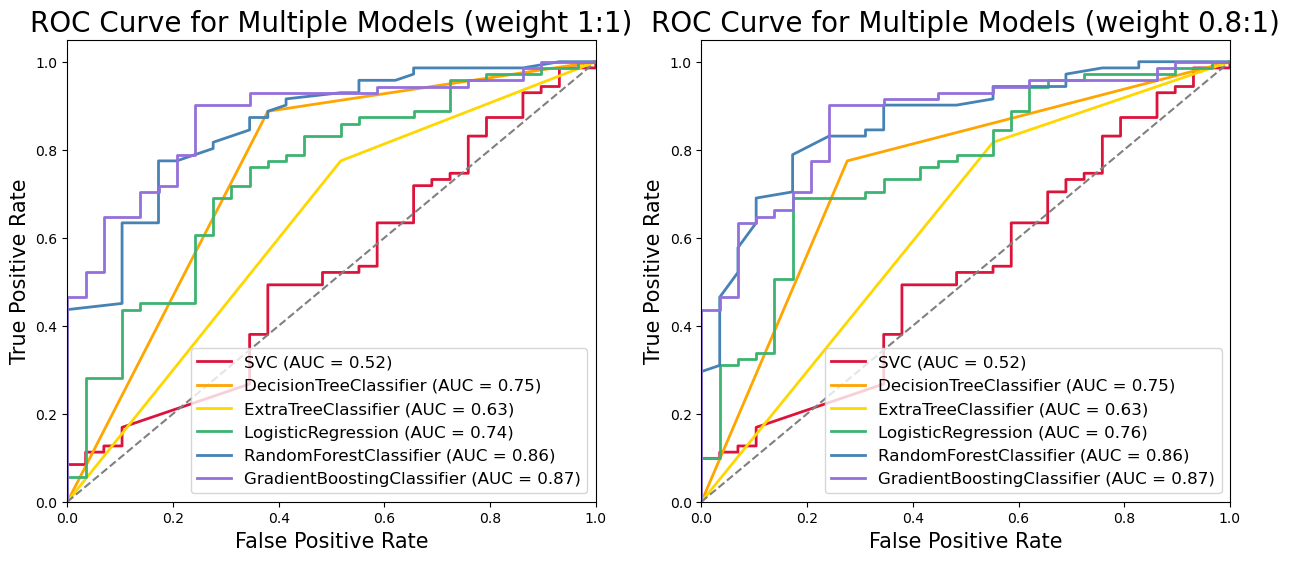

In [21]:
# 对模型进行权重调整
class_weight = {1:1, 0:1}
sample_weight_vect = compute_sample_weight(class_weight, y=y_train)
models = [SVC(gamma='auto', probability=True),DecisionTreeClassifier(), 
          ExtraTreeClassifier(), LogisticRegression(), RandomForestClassifier(), 
          GradientBoostingClassifier()]
# 训练每个算法模型并进行预测
accuracies = []
f1s=[]
for model in models:
    model.fit(X_train, y_train,sample_weight=sample_weight_vect)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    f1 = f1_score(y_test, y_pred)
    f1s.append(f1)

plt.figure(figsize=(13,8))
plt.subplot(2,2,1)
plt.bar(range(len(models)), accuracies)
plt.xticks(range(len(models)), ['SVC','DT','ET','Lgr','RF','GB'])
plt.title('Accuracy for Multiple Models (weight 1:1)', fontsize=20)
# 在每个直方上方添加文本标签，显示高度
for x, y in enumerate(accuracies):
    plt.text(x - 0.15, y + 0.01, '%.3f' % y)

plt.subplot(2,2,2)
plt.bar(range(len(models)), f1s)
plt.xticks(range(len(models)), ['SVC','DT','ET','Lgr','RF','GB'])
plt.title('f1 for Multiple Models (weight 1:1)', fontsize=20)
for x, y in enumerate(f1s):
    plt.text(x - 0.15, y + 0.01, '%.3f' % y)
# 调整子图之间的间距
plt.tight_layout()
# 对模型进行权重调整
class_weight = {1:0.84, 0:1}
sample_weight_vect = compute_sample_weight(class_weight, y=y_train)
models1 = [SVC(gamma='auto', probability=True),DecisionTreeClassifier(), ExtraTreeClassifier(), LogisticRegression(), RandomForestClassifier(), GradientBoostingClassifier()]
# 训练每个算法模型并进行预测
accuracies1 = []
f1s1=[]
for model in models1:
    model.fit(X_train, y_train,sample_weight=sample_weight_vect)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies1.append(accuracy)
    f1 = f1_score(y_test, y_pred)
    f1s1.append(f1)
    # print(model,':',accuracy)

# 绘制准确率直方图
plt.subplot(2,2,3)
plt.bar(range(len(models1)), accuracies1)
plt.xticks(range(len(models1)), ['SVC','DT','ET','Lgr','RF','GB'])
plt.title('Accuracy for Multiple Models (weight 0.8:1)', fontsize=20)
for x, y in enumerate(accuracies1):
    plt.text(x - 0.15, y + 0.01, '%.3f' % y)


plt.subplot(2,2,4)
plt.bar(range(len(models)), f1s1)
plt.xticks(range(len(models)), ['SVC','DT','ET','Lgr','RF','GB'])
plt.title('f1 for Multiple Models (weight 0.8:1)', fontsize=20)
for x, y in enumerate(f1s1):
    plt.text(x - 0.15, y + 0.01, '%.3f' % y)

# 调整子图之间的间距
plt.tight_layout()
plt.show()

# 创建新画布绘制每个模型的roc曲线
plt.figure(figsize=(15,6), dpi=100)
plt.subplot(1,2,1)
colors = ['crimson', 'orange', 'gold', 'mediumseagreen', 'steelblue', 'mediumpurple']
for model, color in zip(models, colors):
    y_score = model.predict_proba(X_test)[:, 1] # 获取预测概率
    fpr, tpr, thresholds = roc_curve(y_test, y_score) # 计算fpr和tpr
    auc_value = auc(fpr, tpr) # 计算auc值
    plt.plot(fpr, tpr, lw=2, label=model.__class__.__name__ + ' (AUC = %.2f)' % auc_value, color=color) # 绘制roc曲线并设置标签
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.title('ROC Curve for Multiple Models (weight 1:1)', fontsize=20)
plt.legend(loc='lower right', fontsize=12)

# 创建新画布绘制每个模型的roc曲线
plt.subplot(1,2,2)
colors = ['crimson', 'orange', 'gold', 'mediumseagreen', 'steelblue', 'mediumpurple']
for model, color in zip(models1, colors):
    y_score = model.predict_proba(X_test)[:, 1] # 获取预测概率
    fpr, tpr, thresholds = roc_curve(y_test, y_score) # 计算fpr和tpr
    auc_value = auc(fpr, tpr) # 计算auc值
    plt.plot(fpr, tpr, lw=2, label=model.__class__.__name__ + ' (AUC = %.2f)' % auc_value, color=color) # 绘制roc曲线并设置标签
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.title('ROC Curve for Multiple Models (weight 0.8:1)', fontsize=20)
plt.legend(loc='lower right', fontsize=12)
plt.show
# 保存或显示图像
# plt.savefig('roc.png')

可以看到各个模型在测试集上的预测准确率最高的是**RandomForestClassifier**和**GradientBoostingClassifier**，分别为**0.8**和**0.84**。

绘制ROC曲线进行评估，可见，**AUC**最高的为**GradientBoostingClassifier**，达到了0.87，说明该模型在区分正类和负类方面有很好的表现。



**交叉验证法**

使用10折交叉验证和网格搜索来优化RF和GB模型。

In [22]:
# 使用RF模型进行训练和预测
# 根据之前的结果，选择调整过比例的RF模型和未经调整比例的GB模型。
rf = RandomForestClassifier()
class_weight = {1:0.84, 0:1}
sample_weight_vect = compute_sample_weight(class_weight, y=y_train)
rf.fit(X_train, y_train,sample_weight=sample_weight_vect)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]

# 使用GB模型进行训练和预测
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
y_prob_gb = gb.predict_proba(X_test)[:,1]

# 计算并打印评估指标
acc_rf = accuracy_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)
f1_rf = f1_score(y_test, y_pred_rf)
acc_gb = accuracy_score(y_test, y_pred_gb)
auc_gb = roc_auc_score(y_test, y_prob_gb)
f1_gb = f1_score(y_test, y_pred_gb)
print(f'RF accuracy: {acc_rf:.4f}, AUC: {auc_rf:.4f}, F1:{f1_rf:.4F}')
print(f'GB accuracy: {acc_gb:.4f}, AUC: {auc_gb:.4f}, F1:{f1_gb:.4F}')

RF accuracy: 0.7900, AUC: 0.8657, F1:0.8591
GB accuracy: 0.8500, AUC: 0.8718, F1:0.8980


In [23]:
# 使用交叉验证来评估RF模型的性能
print('交叉验证评估模型性能')
rf1 = RandomForestClassifier()
acc_rf = cross_val_score(rf1, X_train, y_train, cv=10, scoring='accuracy')
auc_rf = cross_val_score(rf1, X_train, y_train, cv=10, scoring='roc_auc')
print(f'RF accuracy: {acc_rf.mean():.4f}')
print(f'RF AUC: {auc_rf.mean():.4f}')

# 使用交叉验证来评估GB模型的性能
gb1 = GradientBoostingClassifier()
acc_gb = cross_val_score(gb1, X_train, y_train, cv=10, scoring='accuracy')
auc_gb = cross_val_score(gb1, X_train, y_train, cv=10, scoring='roc_auc')

print(f'GB accuracy: {acc_gb.mean():.4f}')
print(f'GB AUC: {auc_gb.mean():.4f}')
print(' ')
print('网格搜索调整超参数')

# 使用网格搜索来调整RF模型的超参数
rf_params = {'n_estimators': [50, 100, 150 ], 'max_depth': [5, 10, 15, None ], 'max_features': ['auto', 'sqrt', 'log2']}
rf_grid_acc = GridSearchCV(rf, rf_params, cv=10, scoring='accuracy')
rf_grid_roc = GridSearchCV(rf, rf_params, cv=10, scoring='roc_auc')
rf_grid_acc = rf_grid_acc.fit(X_train, y_train)
rf_grid_roc = rf_grid_roc.fit(X_train, y_train)
print(f'Best RF parameters (accuracy): {rf_grid_acc.best_params_},Best RF accuracy: {rf_grid_acc.best_score_:.4f}')
print(f'Best RF parameters (AUC): {rf_grid_roc.best_params_},Best RF AUC: {rf_grid_roc.best_score_:.4f}')

# 使用网格搜索来调整GB模型的超参数
gb_params = {'n_estimators': [50, 100, 150 ], 'max_depth': [3, 5, 10, 15], 'learning_rate': [0.01, 0.1, 0.2]}
gb_grid_acc = GridSearchCV(rf, rf_params, cv=10, scoring='accuracy')
gb_grid_roc = GridSearchCV(rf, rf_params, cv=10, scoring='roc_auc')
gb_grid_acc = gb_grid_acc.fit(X_train, y_train)
gb_grid_roc = gb_grid_roc.fit(X_train, y_train)
print(f'Best gb parameters (accuracy): {gb_grid_acc.best_params_}, Best gb accuracy: {gb_grid_acc.best_score_:.4f}')
print(f'Best gb parameters (AUC): {gb_grid_roc.best_params_},Best gb AUC: {gb_grid_roc.best_score_:.4f}')

交叉验证评估模型性能
RF accuracy: 0.7511
RF AUC: 0.7600
GB accuracy: 0.7467
GB AUC: 0.7637
 
网格搜索调整超参数
Best RF parameters (accuracy): {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 50},Best RF accuracy: 0.7644
Best RF parameters (AUC): {'max_depth': 5, 'max_features': 'auto', 'n_estimators': 100},Best RF AUC: 0.7784
Best gb parameters (accuracy): {'max_depth': None, 'max_features': 'log2', 'n_estimators': 150}, Best gb accuracy: 0.7644
Best gb parameters (AUC): {'max_depth': 10, 'max_features': 'log2', 'n_estimators': 100},Best gb AUC: 0.7783


In [24]:
y_pred_gb = gb.predict(X_test)
y_prob_gb = gb.predict_proba(X_test)[:,1]

y_pred_gb_roc = gb_grid_roc.predict(X_test)
y_prob_gb_roc = gb_grid_roc.predict_proba(X_test)[:,1]

y_pred_gb_acc = gb_grid_acc.predict(X_test)
y_prob_gb_acc = gb_grid_acc.predict_proba(X_test)[:,1]

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]

y_pred_rf_roc = gb_grid_roc.predict(X_test)
y_prob_rf_roc = gb_grid_roc.predict_proba(X_test)[:,1]

y_pred_rf_acc = rf_grid_acc.predict(X_test)
y_prob_rf_acc = rf_grid_acc.predict_proba(X_test)[:,1]
# 计算并打印准确率和AUC值
acc_rf1 = accuracy_score(y_test, y_pred_rf)
auc_rf1 = roc_auc_score(y_test, y_prob_rf)
f1_rf1 = f1_score(y_test, y_pred_rf)
acc_rf2 = accuracy_score(y_test, y_pred_rf_roc)
auc_rf2 = roc_auc_score(y_test, y_prob_rf_roc)
f1_rf2 = f1_score(y_test, y_pred_rf_roc)
acc_rf3 = accuracy_score(y_test, y_pred_rf_acc)
auc_rf3 = roc_auc_score(y_test, y_prob_rf_acc)
f1_rf3 = f1_score(y_test, y_pred_rf_acc)

acc_gb1 = accuracy_score(y_test, y_pred_gb)
auc_gb1 = roc_auc_score(y_test, y_prob_gb)
f1_gb1 = f1_score(y_test, y_pred_gb)
auc_gb2 = accuracy_score(y_test, y_pred_gb_roc)
acc_gb2 = roc_auc_score(y_test, y_prob_gb_roc)
f1_gb2 = f1_score(y_test, y_pred_gb_roc)
acc_gb3 = accuracy_score(y_test, y_pred_gb_acc)
auc_gb3 = roc_auc_score(y_test, y_prob_gb_acc)
f1_gb3 = f1_score(y_test, y_pred_gb_acc)




print(f'accuracy——RF1: {acc_rf1:.4f}, RF2: {acc_rf2:.4f}, RF3: {acc_rf3:.4f}')

print(f'AUC——RF1: {auc_rf1:.4f}, RF2: {auc_rf2:.4f}, RF2: {auc_rf3:.4f}')

print(f'F1——RF1: {f1_rf1:.4f}, RF2: {f1_rf2:.4f}, RF2: {f1_rf3:.4f}')

print(f'accuracy——GB1: {acc_gb1:.4f}, GB2: {acc_gb2:.4f}, GB3: {acc_gb3:.4f}')

print(f'AUC——GB1: {auc_gb1:.4f}, GB2: {auc_gb2:.4f}, GB3: {auc_gb3:.4f}')

print(f'F1——GB1: {f1_gb1:.4f}, GB2: {f1_gb2:.4f}, GB3: {f1_gb3:.4f}')

accuracy——RF1: 0.7900, RF2: 0.8200, RF3: 0.8100
AUC——RF1: 0.8657, RF2: 0.8645, RF2: 0.8538
F1——RF1: 0.8591, RF2: 0.8831, RF2: 0.8758
accuracy——GB1: 0.8500, GB2: 0.8645, GB3: 0.8000
AUC——GB1: 0.8718, GB2: 0.8200, GB3: 0.8468
F1——GB1: 0.8980, GB2: 0.8831, GB3: 0.8684


经过交叉验证法调优后，得到的最佳模型为**GB**：GradientBoostingClassifier()。

它可以达到accuracy：**87.42%**，AUC ：**0.79** ， F1：**0.86**

接着选取该模型，对特征重要性进行排序与可视化。

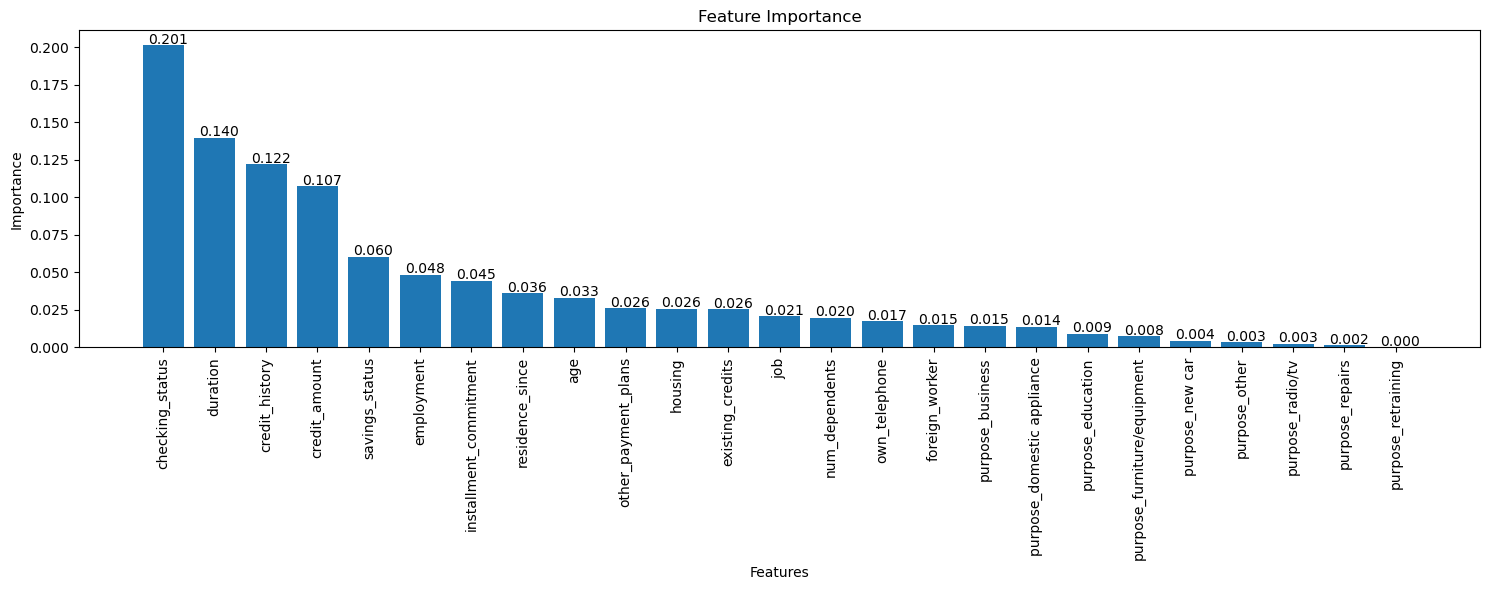

In [25]:
GB=GradientBoostingClassifier(max_depth=10, max_features=None, n_estimators=100)
GB.fit(X_train, y_train)
importance = GB.feature_importances_
# 获取数据集中的特征名称
feature_names = X_train.columns
# 可视化特征重要性
plt.figure(figsize=(15, 6))
plt.bar(range(len(importance)), sorted(importance,reverse=True), tick_label=feature_names)
plt.xticks(rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
# 在每个直方上方添加文本标签，显示高度
for x, y in enumerate(sorted(importance, reverse=True)):
 plt.text(x - 0.3 , y + 0.001, '%.3f' % y)

# 调整子图之间的间距
plt.tight_layout()
plt.show()


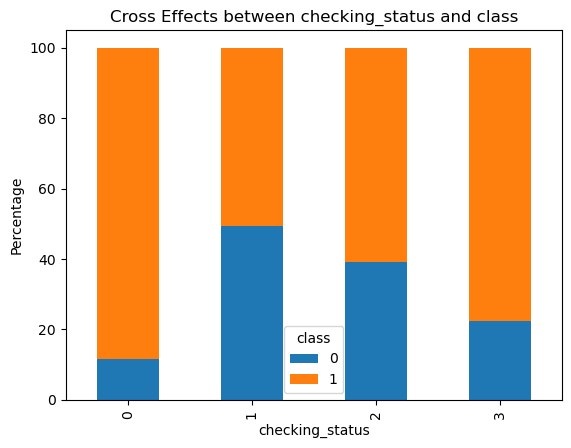

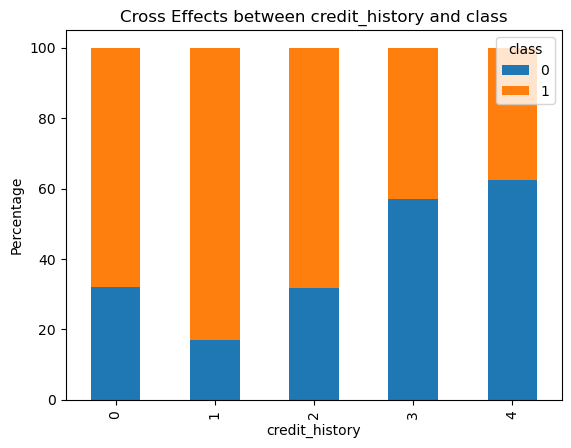

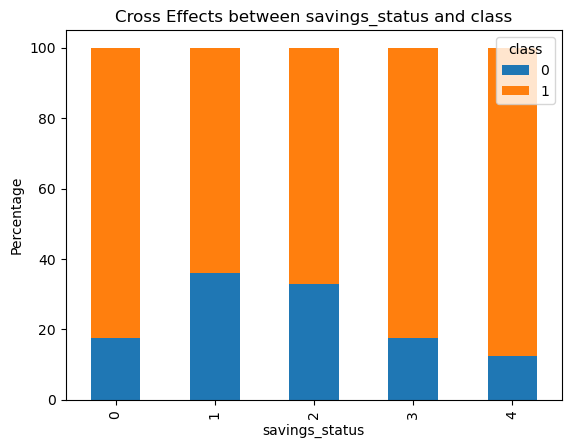

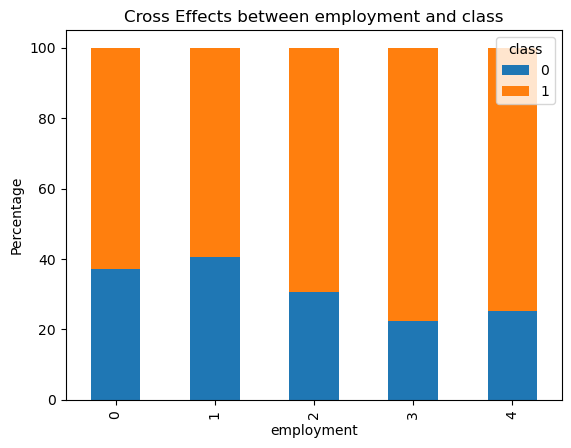

In [26]:

# 定义要分析的变量列表
variables = ['checking_status', 'credit_history', 'savings_status', 'employment']

# 循环生成图表
for var in variables:
    # 使用交叉表计算交叉百分比
    cross_tab = pd.crosstab(data[var], data['class'], normalize='index') * 100

    # 绘制交叉百分比柱状图
    cross_tab.plot(kind='bar', stacked=True)
    plt.xlabel(var)
    plt.ylabel('Percentage')
    plt.title(f'Cross Effects between {var} and class')
    plt.legend(title='class')
    plt.show()

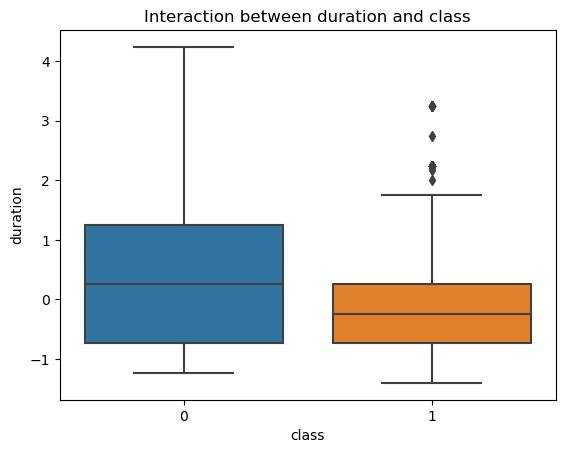

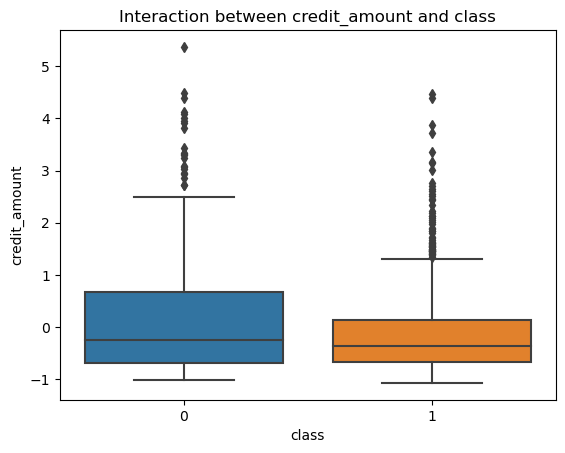

In [27]:
# 绘制箱线图观察重要数值型特征与分类目标之间的关系
variables = ['duration', 'credit_amount']

# 循环生成图表
for var in variables:
    sns.boxplot(x='class', y=var, data=data)
    plt.xlabel("class")
    plt.ylabel(var)
    plt.title(f'Interaction between {var} and class')
    plt.show()

### 五、 总结

#### （一）算法比较

**GradientBoostingClassifier**和**RandomForestClassifier**都是基于决策树的集成学习方法，实验过程中发现它们的区别如下：

核心思想
- GradientBoostingClassifier是一种**提升**方法，它通过迭代地拟合残差的负梯度来优化任意可微分的损失函数。
- RandomForestClassifier是一种**随机森林**方法，它通过对多个独立的决策树进行平均或投票来降低方差。
- GradientBoostingClassifier是一种**串行**的算法，每一棵树都依赖于前一棵树的结果。
- RandomForestClassifier是一种**并行**的算法，每一棵树都可以独立地训练。

超参数
- GradientBoostingClassifier主要通过调整学习率、子采样比例、正则化项等参数来控制拟合过程。
- RandomForestClassifier主要通过调整树的数量、最大深度、最小叶子节点数等参数来控制拟合过程。

速度：
- GradientBoostingClassifier通常需要更多的时间和内存来训练和预测，因为它需要多次迭代和梯度计算。
- RandomForestClassifier通常比较快速和节省内存，因为它只需要一次训练和预测。

对样本扰动敏感度：
- RandomForestClassifier对类别不平衡的数据更敏感，出现类别不平衡需要进行处理后再使用随机森林。

#### （二）算法改进方向

- 特征筛选

根据**特征重要性排序图**，可以看到有一些特征对分类的贡献非常微弱，可以考虑再次进行特征筛选，再做分类，可以加快模型拟合的速度。

- 超参数调优

除了网格搜索，还可以使用**贝叶斯优化**的方法来进行调优。

- 类别不平衡

除了正则化的方法，还可以通过**重采样**的方式进行类别平衡。